 # Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import GridSearchCV

# Load Data

### Data Attributes
This Dataset sourced by some unnamed institute.

Feature Explanation:


<mark>distance_from_home</mark> - the distance from home where the transaction happened.

<mark>distance_from_last_transaction</mark> - the distance from last transaction happened.

<mark>ratio_to_median_purchase_price</mark> - Ratio of purchased price transaction to median purchase price.

<mark>repeat_retailer</mark> - Is the transaction happened from same retailer.

<mark>used_chip</mark> - Is the transaction through chip (credit card).

<mark>used_pin_number</mark> - Is the transaction happened by using PIN number.

<mark>online_order</mark> - Is the transaction an online order.

<mark>fraud</mark> - Is the transaction fraudulent.

In [2]:
# Load the dataset
df = pd.read_csv("../../data/card_transdata.csv")

# Data Prev
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


# Explore Data

In [3]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
print('Raw counts: \n')
print(df['fraud'].value_counts())
print('-----------------------------------')
print('Normalized counts: \n')
print(df['fraud'].value_counts(normalize=True))

Raw counts: 

0.0    912597
1.0     87403
Name: fraud, dtype: int64
-----------------------------------
Normalized counts: 

0.0    0.912597
1.0    0.087403
Name: fraud, dtype: float64


distance_from_home_counts = df['distance_from_home'].value_counts(1)

# Create a horizontal bar plot
ax = distance_from_home_counts.plot.barh()

plt.title('Distribution of Distance from Home')
plt.xlabel('Percentage')
plt.ylabel('Fraud(1) / Genuine(0)')
plt.show()

distance_from_home_counts = df['distance_from_home'].value_counts(1)

# Create a horizontal bar plot
ax = distance_from_home_counts.plot.barh()

plt.title('Distribution of Distance from Home')
plt.xlabel('Percentage')
plt.ylabel('Fraud(1) / Genuine(0)')
plt.show()

distance_from_last_transaction_counts = df['distance_from_last_transaction'].value_counts(1)

# Create a horizontal bar plot
ax = distance_from_last_transaction_counts.plot.barh()

plt.title('Distribution of Distance from last Transaction')
plt.xlabel('Percentage')
plt.ylabel('Fraud(1) / Genuine(0)')
plt.show()

repeat_retailer_counts = df['repeat_retailer'].value_counts(1)

# Create a horizontal bar plot
ax = repeat_retailer_counts.plot.barh()

plt.title('Distribution of Repeat Retailer')
plt.xlabel('Percentage')
plt.ylabel('Repeat Retailer')
plt.show()

repeat_retailer_counts = df['repeat_retailer'].value_counts(1)

# Create a horizontal bar plot
ax = repeat_retailer_counts.plot.barh()

plt.title('Distribution of Repeat Retailer')
plt.xlabel('Percentage')
plt.ylabel('Repeat Retailer')
plt.show()

distance_from_home_counts = df['distance_from_home'].value_counts(1)

# Create a horizontal bar plot
ax = distance_from_home_counts.plot.barh()

plt.title('Distribution of distandce from home')
plt.xlabel('Percentage')
plt.ylabel('Repeat Retailer')
plt.show()

df.columns

# Visualization of the numbers above
ax=sns.countplot (x=df['fraud'], data=df)
print(df['fraud'].value_counts())

# Visualization of the numbers above
ax=sns.countplot (x=df['fraud'], data=df)
print(df['fraud'].value_counts(normalize=True))

# check for covariance
plt.figure(figsize=(10, 7))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='Greens')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 12}, pad=12)
plt.show()

In [ ]:
total trans 100
genuine 95
fraud 5

100 multiple choice
t 95
f 5

100 times as t
my 95/100


all false 5/100

false positive : fraud, but not
false negative:  not fraud, but is (a fraudulent transaction which came through as a genuine transaction(super bad) 10 bucks, 10million)


# Preprocess Data

In [5]:
# Split the data into features (X) and the target variable (y)
X = df.drop("fraud", axis=1)
y = df["fraud"]

In [6]:
# Split the data into training and testing sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
# Data Preprocessing: Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Data is imbalanced
more than 91% of data are Genuine transactions
more than 8% of data are Fraud transactions

Accuracy is a not a good metric for imbalance data set. It won't provide a great picture for the model's overall performance. In imbalanced data sets, the model can predict the majority class and achieve a high score. Aka it's seen more of the majority class and it will simply predict that, in this case it can predict genuine 100% and will be correct 91% of the time. However, it ignore approximately 9% of the time and that 9% is very significant because those are false negative which can cost a lot of money to the firm. 

Example: a fraud transaction is called genuine, where the transaction withdraw $50 dollars from a random bank customer. Not only did the customer lose 50 bucks, it also lost the trust to the bank. This is a lost lost situation. Imagine a bigger number, let's say 1 million. How would you feel?

# Models

In [8]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import  f1_score, roc_auc_score, roc_curve#

lr_model = LogisticRegression().fit(X_train,y_train)

In [9]:
y_pred = lr_model.predict(X_test)

In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.9594
Precision: 0.8963502413413498
Recall: 0.605514558663692
F1 Score: 0.7227722772277227


# Over Sampling & Under Sampling

In [ ]:

smote = SMOTE()
# fit predictor and target variable
x_smote_train, y_smote_train = smote.fit_resample(X_train, y_train)

print('Original dataset shape', len(y))
print('Resample dataset shape', len(y_smote))

In [12]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [13]:
# we need to use smote
# over sample

In [21]:
# Previous original class distribution
print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

Original class distribution: 

0.0    912597
1.0     87403
Name: fraud, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

1.0    730078
0.0    730078
Name: fraud, dtype: int64


LogisticRegression(C=1e+20, fit_intercept=False)
-----------------------------------------
Synthetic sample class distribution: 

0.0    730078
1.0     73007
Name: fraud, dtype: int64
AUC for 0.1: 0.9667530313114695
-------------------------------------------------------------------------------------
LogisticRegression(C=1e+20, fit_intercept=False)
-----------------------------------------
Synthetic sample class distribution: 

0.0    730078
1.0    182519
Name: fraud, dtype: int64
AUC for 0.25: 0.9694181149903511
-------------------------------------------------------------------------------------
LogisticRegression(C=1e+20, fit_intercept=False)
-----------------------------------------
Synthetic sample class distribution: 

0.0    730078
1.0    240925
Name: fraud, dtype: int64
AUC for 0.33: 0.9701619700993293
-------------------------------------------------------------------------------------
LogisticRegression(C=1e+20, fit_intercept=False)
-----------------------------------------
S

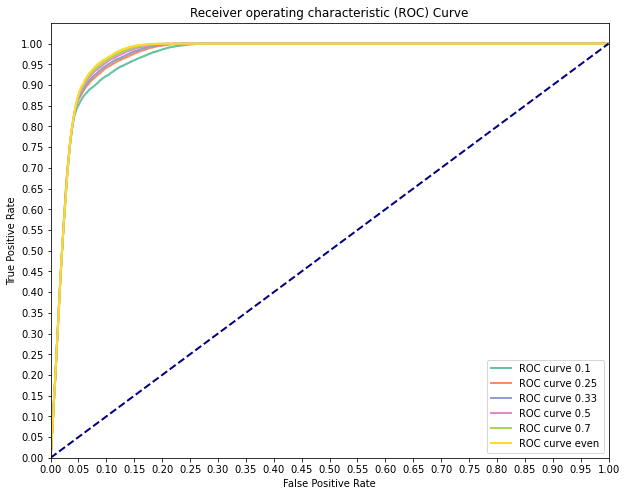

In [15]:
# Now let's compare a few different ratios of minority class to majority class
ratios = [0.1, 0.25, 0.33, 0.5, 0.7, 1]
names = ['0.1', '0.25', '0.33','0.5','0.7','even']
colors = sns.color_palette('Set2')

plt.figure(figsize=(10, 8))

for n, ratio in enumerate(ratios):
    # Fit a model
    smote = SMOTE(sampling_strategy=ratio)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train) 
    logreg = LogisticRegression(fit_intercept=False, C=1e20, solver ='lbfgs')
    model_log = logreg.fit(X_train_resampled, y_train_resampled)
    print(model_log)

    # Predict
    y_hat_test = logreg.predict(X_test)

    y_score = logreg.decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    print('-----------------------------------------')
    print('Synthetic sample class distribution: \n')
    print(pd.Series(y_train_resampled).value_counts()) 
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    print('-------------------------------------------------------------------------------------')
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve {}'.format(names[n]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
oberservation

In [ ]:
chose lR for running time.

tried smote 
and did not result in big performance changes



# `

# conclusion and 